In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df1=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [77]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [78]:
df1['Age'].min() #Given

21

In [79]:
df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]=df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].replace(0,np.nan)

In [80]:
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

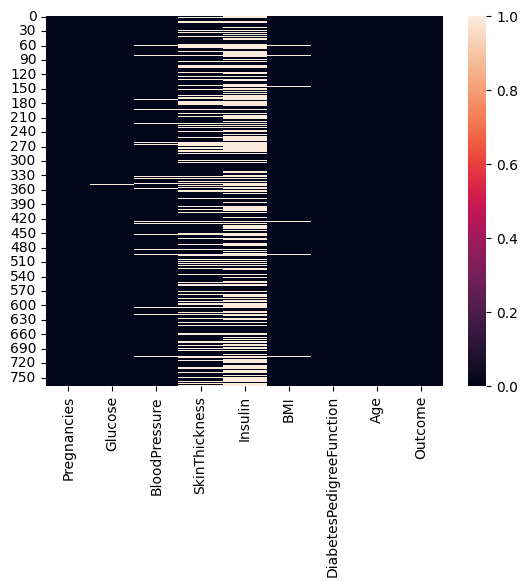

In [81]:
sns.heatmap(df1.isnull())

In [82]:
min_glucose=df1['Glucose'].min()
df1['Glucose']=df1['Glucose'].replace(np.nan, min_glucose )

In [83]:
min_bloodpressure=df1['BloodPressure'].min()
df1['BloodPressure']=df1['BloodPressure'].replace(np.nan, min_bloodpressure)

In [84]:
min_BMI=df1['BMI'].min()
df1['BMI']=df1['BMI'].replace(np.nan, min_BMI)

In [85]:
df1.mean()

Pregnancies                   3.845052
Glucose                     121.180990
BloodPressure                70.199219
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.253255
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [86]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(),random_state=10)

df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']]=imputer.fit_transform(df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']])
df1.isna().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,208.83,33.6,0.627,50,1
1,1,85.0,66.0,29.00,56.11,26.6,0.351,31,0
2,8,183.0,64.0,17.22,251.92,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
5,5,116.0,74.0,20.57,105.37,25.6,0.201,30,0
6,3,78.0,50.0,32.00,88.00,31.0,0.248,26,1
7,10,115.0,24.0,37.95,103.28,35.3,0.134,29,0
8,2,197.0,70.0,45.00,543.00,30.5,0.158,53,1
9,8,125.0,96.0,16.15,192.65,18.2,0.232,54,1


In [89]:
df1=df1.drop('Pregnancies', axis=1) #Domain knowledge suggests that "Pregnancies" might not be directly related to diabetes


In [90]:
df1=df1.drop('Age', axis=1)

In [91]:
df1.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148.0,72.0,35.00,208.83,33.6,0.627,1
1,85.0,66.0,29.00,56.11,26.6,0.351,0
2,183.0,64.0,17.22,251.92,23.3,0.672,1
3,89.0,66.0,23.00,94.00,28.1,0.167,0
4,137.0,40.0,35.00,168.00,43.1,2.288,1
5,116.0,74.0,20.57,105.37,25.6,0.201,0
6,78.0,50.0,32.00,88.00,31.0,0.248,1
7,115.0,24.0,37.95,103.28,35.3,0.134,0
8,197.0,70.0,45.00,543.00,30.5,0.158,1
9,125.0,96.0,16.15,192.65,18.2,0.232,1


<Axes: >

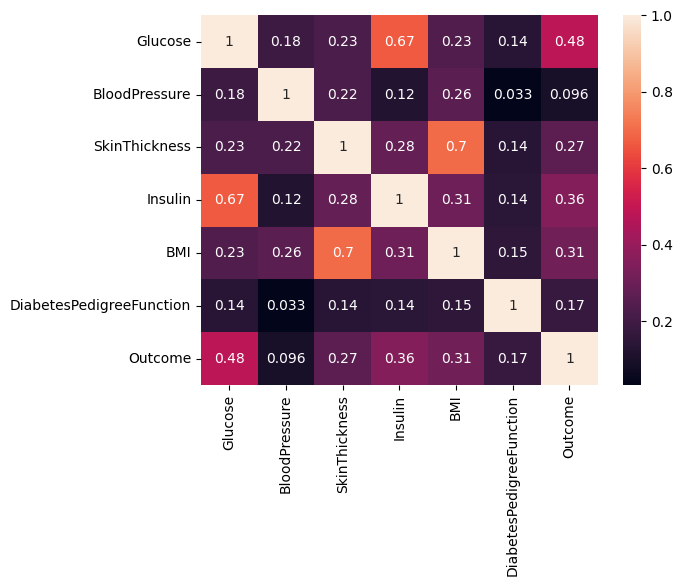

In [92]:
correlation_matrix=df1.corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

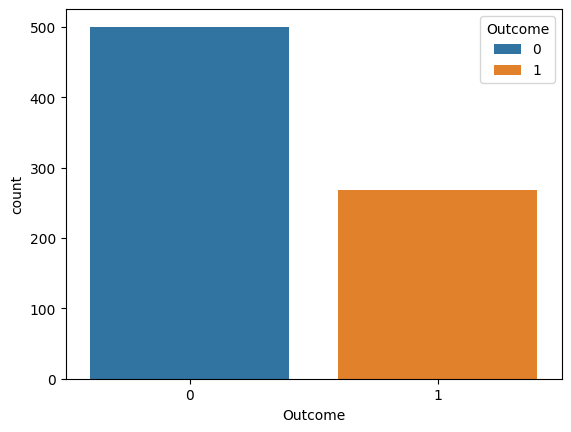

In [93]:
sns.countplot(x='Outcome',hue='Outcome',data=df1)

In [94]:
data_length = len(df1)
having_diabetic = (len(df1[df1.Outcome==1])/data_length)*100
print(f'Population in our sample who is diabetic : {round(having_diabetic,2)}%')
non_diabetic = (len(df1[df1.Outcome==0])/data_length)*100
print(f'Population in our sample who is non-diabetic : {round(non_diabetic,2)}%')

Population in our sample who is diabetic : 34.9%
Population in our sample who is non-diabetic : 65.1%


Text(0.5, 0, 'Outcome')

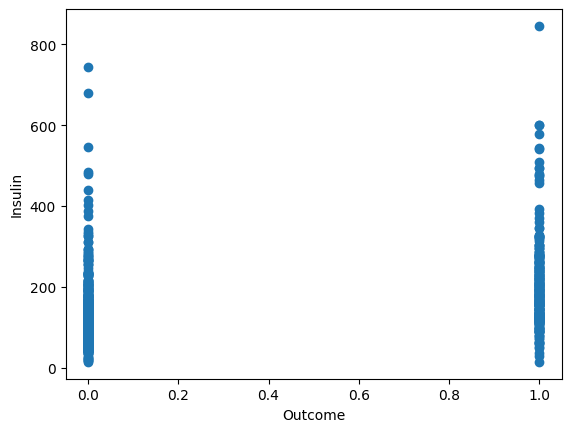

In [95]:
plt.scatter(x='Outcome',y='Insulin',data=df1)
plt.ylabel('Insulin')
plt.xlabel('Outcome')

Text(0.5, 0, 'Outcome')

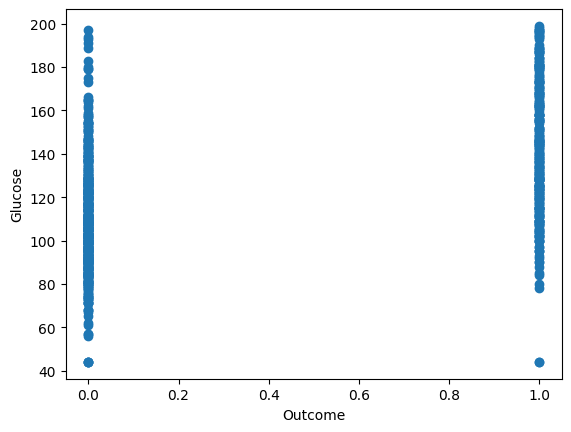

In [96]:
plt.scatter(x='Outcome',y='Glucose',data=df1)
plt.ylabel('Glucose')
plt.xlabel('Outcome')

Text(0.5, 0, 'Outcome')

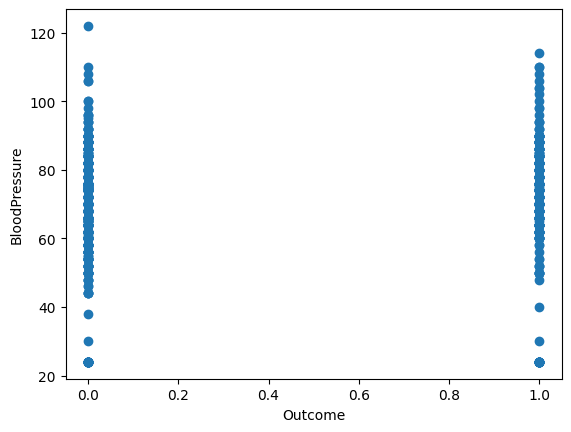

In [97]:
plt.scatter(x='Outcome',y='BloodPressure',data=df1)
plt.ylabel('BloodPressure')
plt.xlabel('Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

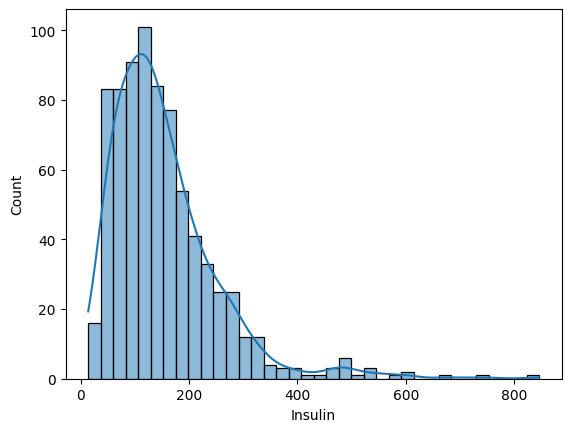

In [98]:
sns.histplot(data=df1,x='Insulin',kde=True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

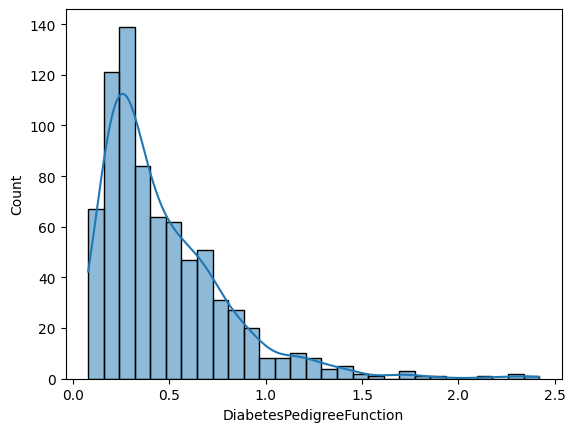

In [99]:
sns.histplot(data=df1,x='DiabetesPedigreeFunction',kde=True)

In [100]:
def full_diagnostic(df1,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df1.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df1[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df1,hue = class_col)

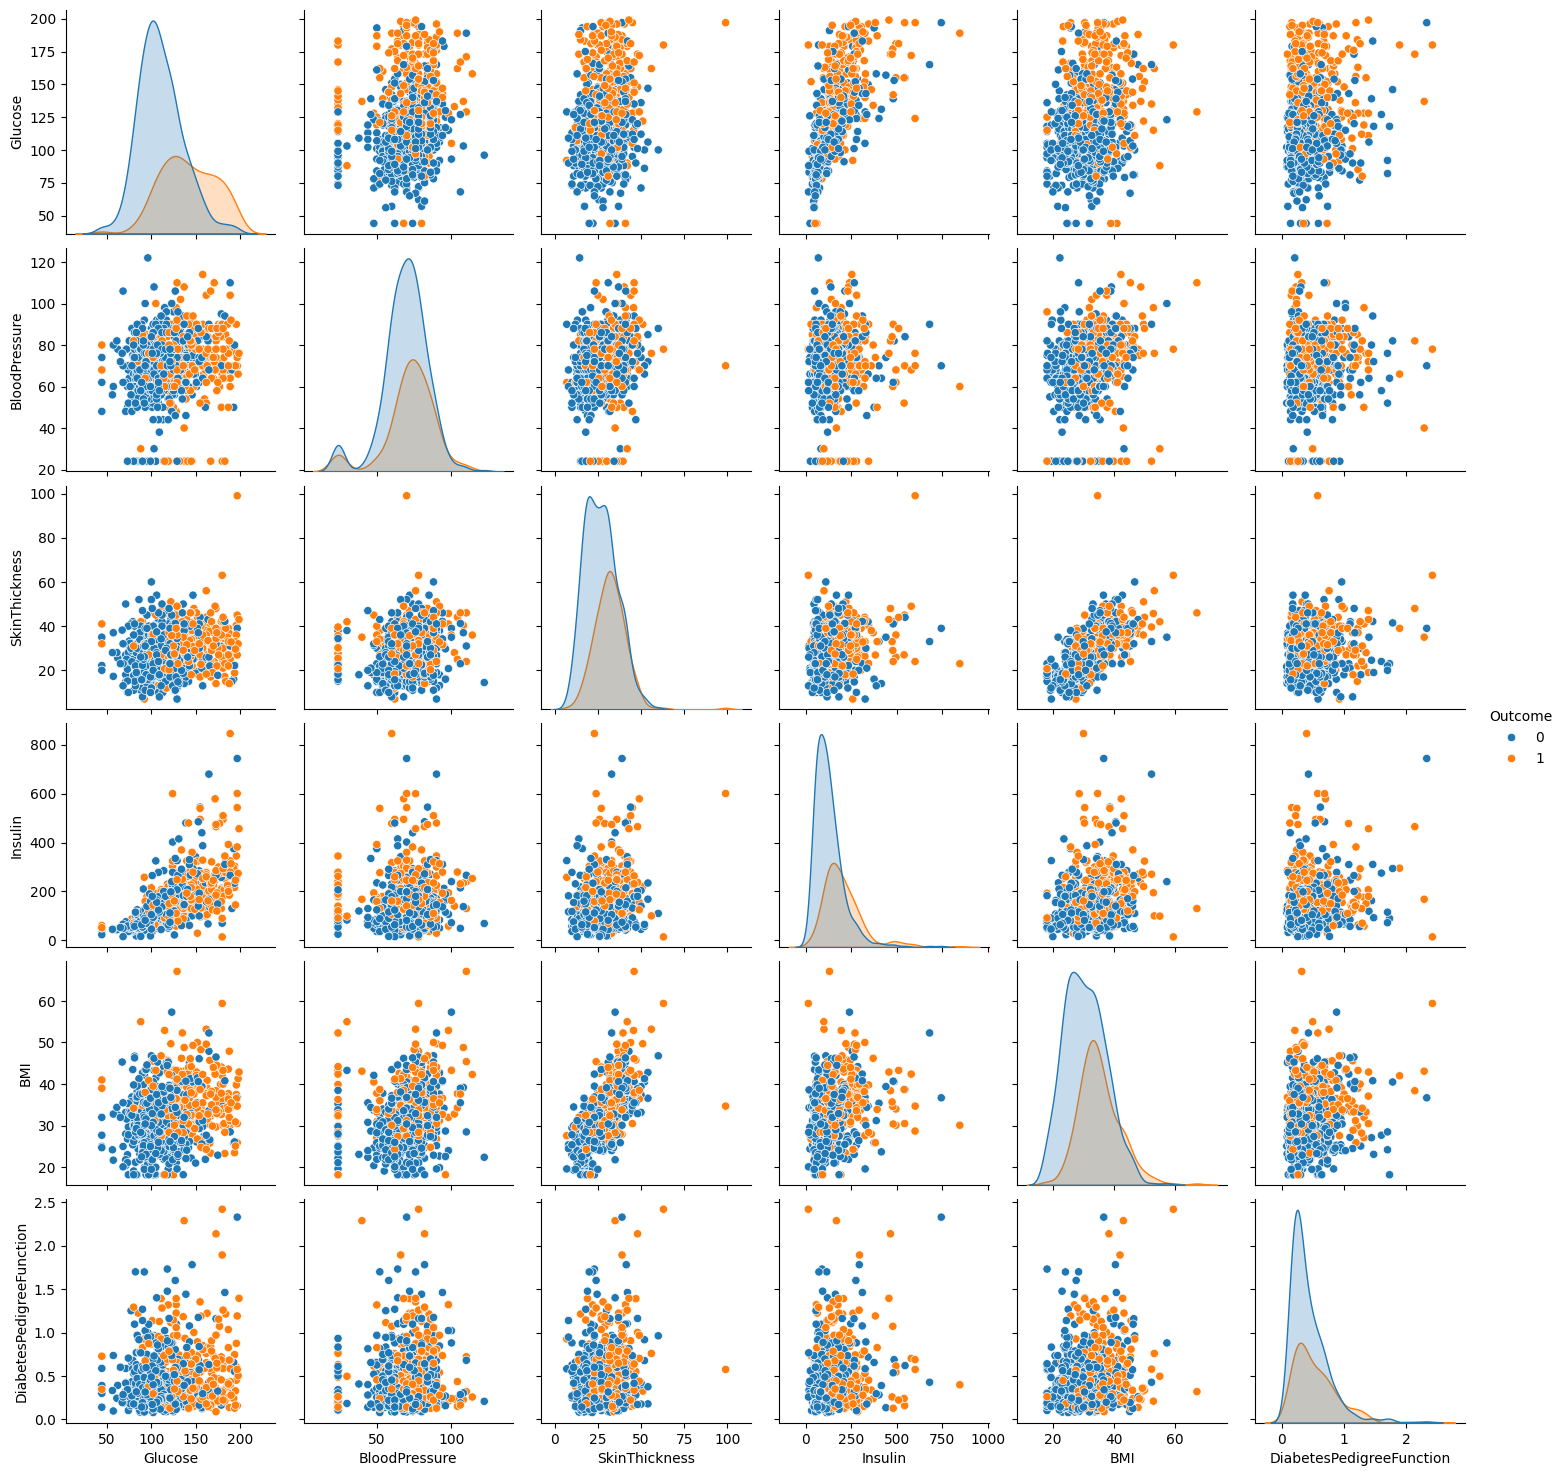

In [101]:
full_diagnostic(df1,class_col = 'Outcome',cols_to_exclude=['Age'])

In [102]:
from scipy.stats import skew

for i in ('SkinThickness','BMI','Glucose', 'BloodPressure','Insulin','DiabetesPedigreeFunction'):
  column_skewness = skew(df1[i])
  print(i,':',column_skewness)

SkinThickness : 0.6946671007059984
BMI : 0.5159530095896947
Glucose : 0.44663103253113956
BloodPressure : -0.83816930258491
Insulin : 2.121564038257696
DiabetesPedigreeFunction : 1.9161592037386292


In [103]:
df1['DiabetesPedigreeFunction']=np.log(df1['DiabetesPedigreeFunction'])
skew(df1['DiabetesPedigreeFunction'])

0.11395456387082803

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

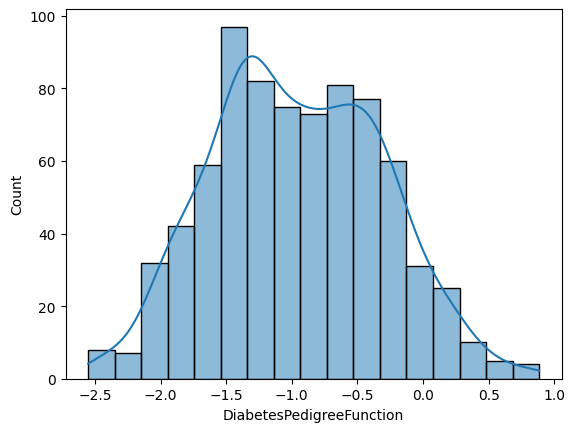

In [104]:
sns.histplot(data=df1, x='DiabetesPedigreeFunction', kde=True)

In [105]:
df1['Insulin']=np.log(df1['Insulin'])
skew(df1['Insulin'])

-0.21184575127714736

<Axes: xlabel='Insulin', ylabel='Count'>

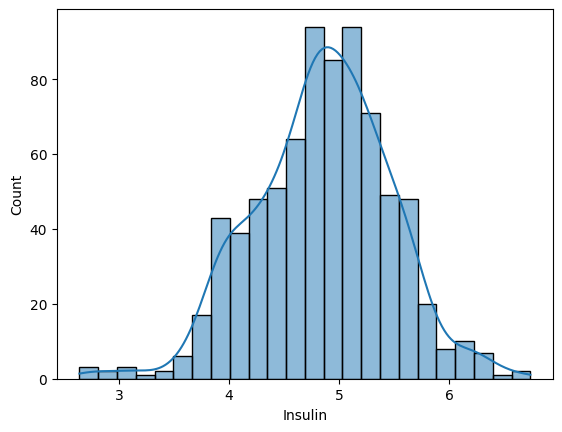

In [106]:
sns.histplot(data=df1,x='Insulin',kde=True)

In [107]:
df1['SkinThickness']=np.log(df1['SkinThickness'])
skew(df1['SkinThickness'])

-0.5661039455937453

<Axes: xlabel='SkinThickness', ylabel='Count'>

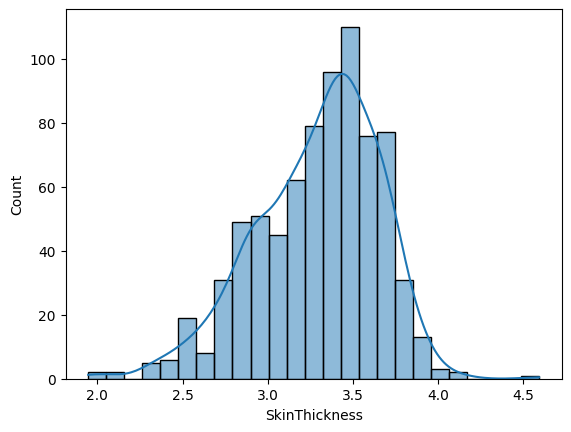

In [108]:
sns.histplot(data=df1, x='SkinThickness',kde=True)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
ScaledX=pd.DataFrame(X_scaled)

In [110]:
ScaledX.head(10)

,0,1,2,3,4,5
0,0.863703,0.114339,0.726262,0.799403,0.190314,0.765848
1,-1.165204,-0.266626,0.206000,-1.333366,-0.798884,-0.135159
2,1.990874,-0.393615,-1.236011,1.103836,-1.265221,0.873492
3,-1.036385,-0.266626,-0.435299,-0.496003,-0.586913,-1.288739
4,0.509449,-1.917479,0.726262,0.446340,1.532798,2.776227
5,-0.166853,0.241328,-0.744217,-0.310700,-0.940199,-1.000945
6,-1.390638,-1.282535,0.478343,-0.603043,-0.177103,-0.674616
7,-0.199058,-2.933388,0.950138,-0.343213,0.430548,-1.630645
8,2.441742,-0.012649,1.421544,2.350186,-0.247760,-1.374775
9,0.122991,1.638203,-1.413491,0.668527,-1.985923,-0.778190


In [111]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
RobustX=pd.DataFrame(X_scaled)

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(df1.drop('Outcome', axis=1))
MinMaxX=pd.DataFrame(X_scaled)

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df1.drop('Outcome', axis=1),df1['Outcome'],test_size=0.2, random_state=101)
# X_train, X_test, y_train, y_test= train_test_split(MinMaxX,df1['Outcome'],test_size=0.2, random_state=101)


#RobustScaler and StandardScaler didn't affect the accuracy or the ROC_AUC of the model.

In [114]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #Oversampling of the dataset didn't improve the ROC_AUC or the precision of the model.

In [115]:
print('Original dataset shape:', Counter(y_train))
print('Oversampled dataset shape:', Counter(y_train_res))

Original dataset shape: Counter({0: 397, 1: 217})
Oversampled dataset shape: Counter({1: 397, 0: 397})


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

for solve in ('liblinear','newton-cholesky','sag', 'newton-cg', 'saga', 'lbfgs'):
  LRModel=LogisticRegression(solver=solve, max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
  LRModel.fit(X_train,y_train)                                                                           # multi_class='multinomial' didn't improve the Accuracy of the
  predictions_diabetes=LRModel.predict(X_test)
  print(solve)
  print(accuracy_score(y_test,predictions_diabetes))
  #Ridge Regression performs better than lasso regression; penalty='l2'

liblinear
0.8311688311688312
newton-cholesky
0.8051948051948052
sag
0.8051948051948052
newton-cg
0.8051948051948052
saga
0.8051948051948052
lbfgs
0.8051948051948052


In [117]:

LRModel=LogisticRegression(solver='liblinear', max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
LRModel.fit(X_train,y_train)                                                      # L1 and L2 regularization didn't improve the model accuracy.

LogisticRegression(max_iter=7600, random_state=101, solver='liblinear')

In [118]:
predictions_diabetes=LRModel.predict(X_test)

In [119]:

print(classification_report(y_test,predictions_diabetes))

#Precision: Out of all the positive predictions made by the model, how many were correct;
#Recall: Out of all the actual positive cases, how many did the model correctly identified;

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.79      0.67      0.72        51

    accuracy                           0.83       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



<Axes: >

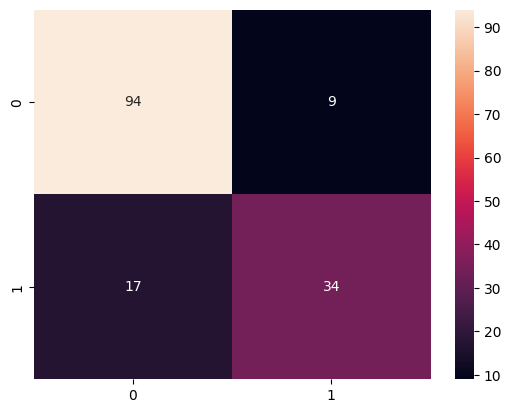

In [120]:
cm=confusion_matrix(y_test, predictions_diabetes)
sns.heatmap(cm, annot=True)

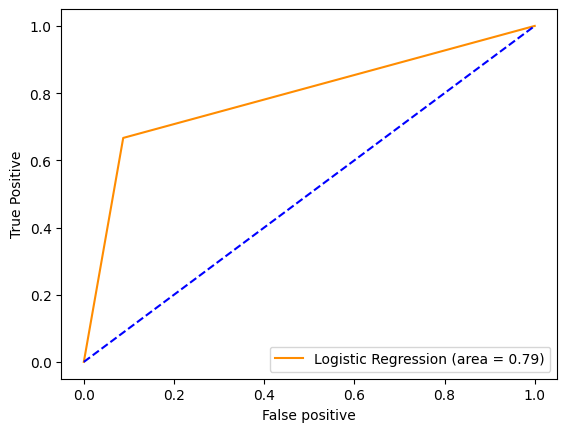

In [121]:
logit_roc_auc = roc_auc_score(y_test, LRModel.predict(X_test)) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, LRModel.predict(X_test)) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [122]:
df1['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [123]:
# X_train, X_test, y_train, y_test= train_test_split(RobustX,df1['Outcome'],test_size=0.2, random_state=101)  #RobustScaling, StandardScaling do not improve the accuracy and ROC_AUC
X_train, X_test, y_train, y_test= train_test_split(df1.drop('Outcome', axis=1),df1['Outcome'],test_size=0.2, random_state=101)

In [124]:
from sklearn import svm

# for k in ('linear','sigmoid','poly','rbf'):
#     model = svm.SVC(kernel=k, gamma='scale')
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     print(k)
#     print(accuracy_score(y_test,y_pred))

In [125]:
# final_model = svm.SVC(kernel='linear', gamma='auto')
# final_model.fit(X_train,y_train)
# y_pred = final_model.predict(X_test)
# print(classification_report(y_test,y_pred))

In [126]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [1, 0.1, 0.01,'scale', 'auto'],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'random_state':[101]}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
y_pred = grid.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear', 'random_state': 101}
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



<Axes: >

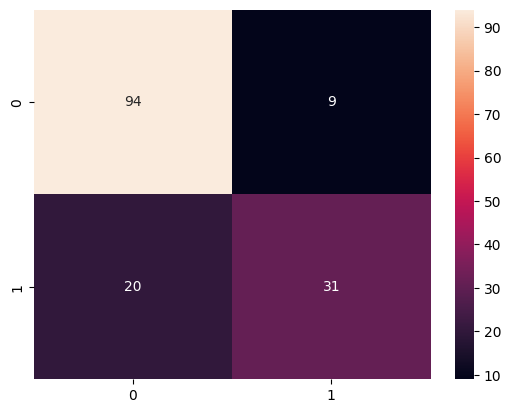

In [127]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

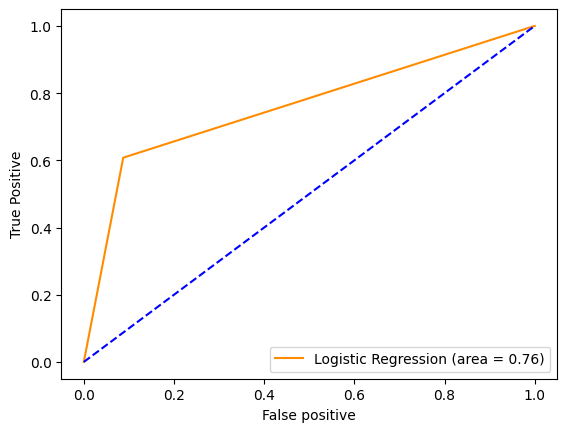

In [128]:
logit_roc_auc = roc_auc_score(y_test, y_pred) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [129]:
#Overall, Logistic regression model performs better than SVM